In [1]:
import numpy as np
from numba import jit, njit, prange
import matplotlib.pyplot as plt
import pandas as pd

## Lorenz Curve: Wealth

The data come from the Survey of Consumer Finances, Federal Reserve (https://www.federalreserve.gov/econres/scfindex.htm)

Net worth (assets less debts) in 2016

In [2]:
# Function to plot lorenz curve

@njit
def lorenz(y):
    n = len(y)
    y = np.sort(y)
    s = np.zeros(n+1)
    s[1:] = np.cumsum(y)
    f_vals = np.zeros(n+1)
    l_vals = np.zeros(n+1)
    for i in range(1, n+1):
        f_vals[i] = i/n
        l_vals[i] = s[i] / s[n]
    return f_vals, l_vals

In [3]:
US_wealth = pd.read_csv('US_wealth.txt')
US_wealth.describe()

,CASEID,NETWORTH
count,238880.000000,2.388800e+05
mean,119440.500000,9.378397e+06
std,68958.860489,5.050908e+07
min,1.000000,-2.340803e+08
25%,59720.750000,2.322932e+04
50%,119440.500000,2.080907e+05
75%,179160.250000,1.351380e+06
max,238880.000000,2.928346e+09


In [20]:
l_vals, f_vals = lorenz(US_wealth.NETWORTH.values)

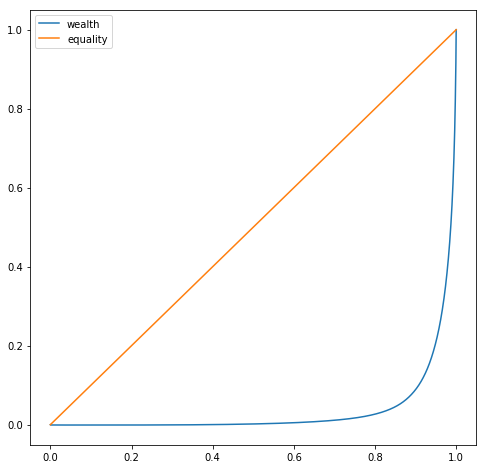

In [21]:
plt.figure(figsize=(8, 8))

plt.plot(l_vals, f_vals, label='wealth')
plt.plot(l_vals, l_vals, label='equality')
plt.legend()

plt.show()

## Lorenz Curve: Income

The data is sourced from the IRS - 2015 Adjusted gross income: https://www.irs.gov/statistics/soi-tax-stats-individual-statistical-tables-by-size-of-adjusted-gross-income

In [6]:
data = pd.read_csv('lorenz_US.csv', index_col=0)
data.head()

,Population pct,Income pct
Income bracket,,
No adjusted gross income,1.4,NaN
"$1 under $5,000",6.7,0.3
"$5,000 under $10,000",14.3,1.1
"$10,000 under $15,000",22.4,2.6
"$15,000 under $20,000",29.9,4.5


In [17]:
x = data['Population pct']
y = data['Income pct']

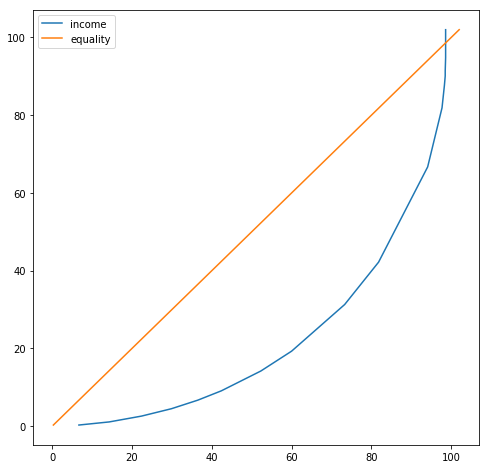

In [22]:
plt.figure(figsize=(8, 8))

plt.plot(x, y, label='income')
plt.plot(y, y, label='equality')

plt.legend()


plt.show()